In [ ]:
# Install latest pre-release version of bigdl-chronos 
# Installing bigdl-chronos from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-chronos[all]
!pip uninstall -y torchtext # uninstall torchtext to avoid version conflict
exit() # restart the runtime to refresh installed pkg

In [2]:
import numpy as np
import pandas as pd

In [3]:
import pandas as pd
import urllib.request
import json
import math

In [ ]:
from bigdl.orca.automl import hp
from bigdl.orca import init_orca_context

In [ ]:
init_orca_context(cores=4, init_ray_on_spark=True)

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-0.14.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-0.14.0-SNAPSHOT-jar-with-dependencies.jar pyspark-shell 
Successfully got a SparkContext


2022-01-30 16:14:43,606	INFO services.py:1340 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2022-01-30_16-14-40_261682_229/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-01-30_16-14-40_261682_229/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2022-01-30_16-14-40_261682_229', 'metrics_export_port': 61849, 'node_id': '28ef279338307de6c3b3e2711b3c62ce10f970ef2974b29d73f11b13'}


<SparkContext master=local[4] appName=pyspark-shell>

## Get data

In [4]:
f = open('/content/stock_prices.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
with open('data.json', 'w') as f:
    json.dump(data['data'], f)

data = pd.read_json('data.json')
data

,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
0,VCB,2022-01-20,15:01:03,HOSE,STOCK,86.8,92.8,80.8,85.2,87.5,...,83.100,87.100,85.660,2794300,239372970000,0,0,0.3,0.3000,0.3456
1,VCB,2022-01-19,15:01:02,HOSE,STOCK,87.6,93.7,81.5,87.5,87.5,...,85.000,86.800,86.330,914800,78972420000,500000,41500000000,-0.8,-0.8000,-0.9132
2,VCB,2022-01-18,15:01:03,HOSE,STOCK,86.2,92.2,80.2,85.5,87.6,...,84.000,87.600,86.350,1696600,146506850000,39000,3412500000,1.4,1.4000,1.6241
3,VCB,2022-01-17,15:01:03,HOSE,STOCK,83.4,89.2,77.6,83.0,88.0,...,82.300,86.200,85.640,2628500,225104290000,40030,3476541000,2.8,2.8000,3.3573
4,VCB,2022-01-14,15:01:03,HOSE,STOCK,81.9,87.6,76.2,81.9,83.4,...,81.000,83.400,82.770,1522100,125980020000,30000,2307000000,1.5,1.5000,1.8315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,VCB,2013-01-08,14:01:05,HOSE,STOCK,30.0,31.5,28.5,30.6,31.5,...,12.663,13.251,12.959,1035220,31894000000,0,0,1.5,0.6310,5.0000
2255,VCB,2013-01-07,14:01:04,HOSE,STOCK,29.2,30.6,27.8,28.0,30.0,...,11.779,12.620,12.357,1312740,38559000000,0,0,0.8,0.3365,2.7397
2256,VCB,2013-01-04,14:01:07,HOSE,STOCK,28.5,29.9,27.1,28.0,29.5,...,11.695,12.283,12.124,501540,14455000000,0,0,0.7,0.2945,2.4561
2257,VCB,2013-01-03,14:01:06,HOSE,STOCK,27.8,29.1,26.5,27.9,28.5,...,11.358,11.989,11.801,500650,14043000000,0,0,0.7,0.2945,2.5180


## Kiểm tra null

In [5]:
data.isnull().values.any()

False

In [6]:
data[['date','close']].dtypes

date     datetime64[ns]
close           float64
dtype: object

In [ ]:
data.sort_values(by="date", ignore_index=True, inplace=True)

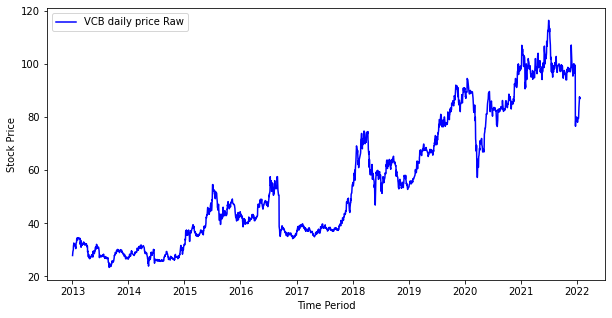

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(data.date, data.close, color='blue', label='VCB daily price Raw')
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# LSTM

## Data Pre-processing

In [ ]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler

df = data[['date', 'close']]
tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="date", target_col="close", with_split=True,val_ratio=0.1,test_ratio=0.1)
minmax_scaler = MinMaxScaler()

for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
    tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train))\
          .roll(lookback=50, horizon=1)

X_train, y_train = tsdata_train.to_numpy()
X_test, y_test = tsdata_test.to_numpy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


((1759, 50, 1), (1759, 1, 1), (175, 50, 1), (175, 1, 1))

## Time series forecasting

In [ ]:
from bigdl.chronos.forecaster.lstm_forecaster import LSTMForecaster

/usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:36: UserWarning: Please install `tensorflow<2.0.0` to use MTNetForecaster.
  warnings.warn("Please install `tensorflow<2.0.0` to use MTNetForecaster.")
/usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:41: UserWarning: Please install `prophet` to use ProphetForecaster.
  warnings.warn("Please install `prophet` to use ProphetForecaster.")
/usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:46: UserWarning: Please install `pmdarima` to use ARIMAForecaster.
  warnings.warn("Please install `pmdarima` to use ARIMAForecaster.")


In [ ]:
# Hyperparameters
feature_dim = X_train.shape[-1]
target_dim = 1
hidden_dim = 10
learning_rate = 0.01
batch_size = 16
epochs = 50

In [ ]:
LSTM_forecaster = LSTMForecaster(past_seq_len=X_train.shape[1],
                            input_feature_num=feature_dim,
                            output_feature_num=target_dim,
                            hidden_dim=32,
                            lr=learning_rate,          
                            distributed=True,
                            )

(PytorchRayWorker pid=459) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:36: UserWarning: Please install `tensorflow<2.0.0` to use MTNetForecaster.
(PytorchRayWorker pid=459)   warnings.warn("Please install `tensorflow<2.0.0` to use MTNetForecaster.")
(PytorchRayWorker pid=459) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:41: UserWarning: Please install `prophet` to use ProphetForecaster.
(PytorchRayWorker pid=459)   warnings.warn("Please install `prophet` to use ProphetForecaster.")
(PytorchRayWorker pid=459) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:46: UserWarning: Please install `pmdarima` to use ARIMAForecaster.
(PytorchRayWorker pid=459)   warnings.warn("Please install `pmdarima` to use ARIMAForecaster.")


In [ ]:
LSTM_forecaster.fit(data=(X_train, y_train), batch_size=batch_size, epochs=epochs)

(PytorchRayWorker pid=459) [2022-01-30 16:14:57] INFO     Added key: store_based_barrier_key:1 to store for rank: 0
(PytorchRayWorker pid=459) [2022-01-30 16:14:57] INFO     Rank 0: Completed store-based barrier for 1 nodes.
(PytorchRayWorker pid=459) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
(PytorchRayWorker pid=459)   "num_layers={}".format(dropout, num_layers))
(PytorchRayWorker pid=459) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/utils.py:33: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning wi

[{'batch_count': 110,
  'epoch': 1,
  'last_train_loss': 0.0002466430014465004,
  'num_samples': 1759,
  'train_loss': 0.006943968690334432},
 {'batch_count': 110,
  'epoch': 2,
  'last_train_loss': 0.00020341709023341537,
  'num_samples': 1759,
  'train_loss': 0.0005498933342773617},
 {'batch_count': 110,
  'epoch': 3,
  'last_train_loss': 0.00019515880558174103,
  'num_samples': 1759,
  'train_loss': 0.0004831933161507071},
 {'batch_count': 110,
  'epoch': 4,
  'last_train_loss': 0.0002110025961883366,
  'num_samples': 1759,
  'train_loss': 0.0004590040510200015},
 {'batch_count': 110,
  'epoch': 5,
  'last_train_loss': 0.00022480840561911464,
  'num_samples': 1759,
  'train_loss': 0.00042768334496672087},
 {'batch_count': 110,
  'epoch': 6,
  'last_train_loss': 0.00023881181550677866,
  'num_samples': 1759,
  'train_loss': 0.0003974469769945275},
 {'batch_count': 110,
  'epoch': 7,
  'last_train_loss': 0.00025233684573322535,
  'num_samples': 1759,
  'train_loss': 0.0003705186288019

In [ ]:
LSTM_forecaster.to_local()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [ ]:
# make prediction
LSTM_y_pred = LSTM_forecaster.predict(X_test)

In [ ]:
LSTM_y_pred_unscale = tsdata_test.unscale_numpy(LSTM_y_pred)
y_test_unscale = tsdata_test.unscale_numpy(y_test)

In [ ]:
from bigdl.orca.automl.metrics import Evaluator
print("RMSE is", Evaluator.evaluate("rmse", y_test_unscale, LSTM_y_pred_unscale, multioutput='uniform_average'))
print("MAPE is", Evaluator.evaluate("mape", y_test_unscale, LSTM_y_pred_unscale, multioutput='uniform_average'))

RMSE is 2.3966674972371305
MAPE is 1.4693196172605043


# Seq2SeqForecaster

## Data Pre-processing

In [ ]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler

df = data[['date', 'close']]
tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="date", target_col="close", with_split=True,val_ratio=0.1, test_ratio=0.1)
minmax_scaler = MinMaxScaler()

for tsdata in [tsdata_train, tsdata_test]:
    tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train))\
          .roll(lookback=50, horizon=1)

X_train, y_train = tsdata_train.to_numpy()
X_test, y_test = tsdata_test.to_numpy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1759, 50, 1), (1759, 1, 1), (175, 50, 1), (175, 1, 1))

## Time series forecasting

In [ ]:
from bigdl.chronos.forecaster.seq2seq_forecaster import Seq2SeqForecaster

In [ ]:
# Hyperparameters
feature_dim = X_train.shape[-1]
target_dim = 1
hidden_dim = 10
learning_rate = 0.001
batch_size = 16
epochs = 50

In [ ]:
Seq2Seq_forecaster = Seq2SeqForecaster(past_seq_len=X_train.shape[1],
                            future_seq_len=1,
                            input_feature_num=1,
                            output_feature_num=1,
                            lr=learning_rate,
                            distributed=True,
                            )

(PytorchRayWorker pid=460) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:36: UserWarning: Please install `tensorflow<2.0.0` to use MTNetForecaster.
(PytorchRayWorker pid=460)   warnings.warn("Please install `tensorflow<2.0.0` to use MTNetForecaster.")
(PytorchRayWorker pid=460) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:41: UserWarning: Please install `prophet` to use ProphetForecaster.
(PytorchRayWorker pid=460)   warnings.warn("Please install `prophet` to use ProphetForecaster.")
(PytorchRayWorker pid=460) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:46: UserWarning: Please install `pmdarima` to use ARIMAForecaster.
(PytorchRayWorker pid=460)   warnings.warn("Please install `pmdarima` to use ARIMAForecaster.")


In [ ]:
Seq2Seq_forecaster.fit(data=(X_train, y_train), batch_size=batch_size, epochs=epochs)

(PytorchRayWorker pid=460) [2022-01-30 16:18:15] INFO     Added key: store_based_barrier_key:1 to store for rank: 0
(PytorchRayWorker pid=460) [2022-01-30 16:18:15] INFO     Rank 0: Completed store-based barrier for 1 nodes.
(PytorchRayWorker pid=460) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/utils.py:33: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
(PytorchRayWorker pid=460)   return DataLoader(TensorDataset(torch.from_numpy(data[0]).float(),
 99%|█████████▉| 109/110 [00:07<00:00, 13.92batch/s, loss=0.000792]
[2022-01-30 16:18:23] INFO     Finished training ep

[{'batch_count': 110,
  'epoch': 1,
  'last_train_loss': 0.0013343313476070762,
  'num_samples': 1759,
  'train_loss': 0.022405451972203276},
 {'batch_count': 110,
  'epoch': 2,
  'last_train_loss': 0.0006847576587460935,
  'num_samples': 1759,
  'train_loss': 0.0011783211203511739},
 {'batch_count': 110,
  'epoch': 3,
  'last_train_loss': 0.00046624228707514703,
  'num_samples': 1759,
  'train_loss': 0.001117084417924324},
 {'batch_count': 110,
  'epoch': 4,
  'last_train_loss': 0.00025168093270622194,
  'num_samples': 1759,
  'train_loss': 0.0008575851606813192},
 {'batch_count': 110,
  'epoch': 5,
  'last_train_loss': 0.0004570909368339926,
  'num_samples': 1759,
  'train_loss': 0.0008528811125355577},
 {'batch_count': 110,
  'epoch': 6,
  'last_train_loss': 0.0002873215707950294,
  'num_samples': 1759,
  'train_loss': 0.0006759726145434987},
 {'batch_count': 110,
  'epoch': 7,
  'last_train_loss': 0.0004332184907980263,
  'num_samples': 1759,
  'train_loss': 0.0006130018724923326},

In [ ]:
Seq2Seq_forecaster.to_local()

[2022-01-30 16:25:07] INFO     Finished training epoch 50, stats on rank 0: {'epoch': 50, 'batch_count': 110, 'num_samples': 1759, 'train_loss': 0.00031402754612455506, 'last_train_loss': 0.0002441985416226089}


In [ ]:
# make prediction
Seq2Seq_y_pred = Seq2Seq_forecaster.predict(X_test)

In [ ]:
Seq2Seq_y_pred_unscale = tsdata_test.unscale_numpy(Seq2Seq_y_pred)
y_test_unscale = tsdata_test.unscale_numpy(y_test)

In [ ]:
from bigdl.orca.automl.metrics import Evaluator
print("RMSE is", Evaluator.evaluate("rmse", y_test_unscale, Seq2Seq_y_pred_unscale, multioutput='uniform_average'))
print("MAPE", Evaluator.evaluate("mape", y_test_unscale, Seq2Seq_y_pred_unscale, multioutput='uniform_average'))

RMSE is 2.5267841803387476
MAPE 1.614305396829505


# N-BeatsForecaster

## Data Pre-processing

In [ ]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler

df = data[['date', 'close']]
tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="date", target_col="close", with_split=True,val_ratio=0.1,test_ratio=0.1)
minmax_scaler = MinMaxScaler()

for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
    tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train))\
          .roll(lookback=50, horizon=1)

X_train, y_train = tsdata_train.to_numpy()
X_test, y_test = tsdata_test.to_numpy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1759, 50, 1), (1759, 1, 1), (175, 50, 1), (175, 1, 1))

## Time series forecasting

In [ ]:
from bigdl.chronos.forecaster.nbeats_forecaster import NBeatsForecaster

In [ ]:
NBeats_forecaster = NBeatsForecaster(past_seq_len=50,
                             future_seq_len=1,
                             stack_types=("generic", "seasonality"),
                             distributed=True
                             )

(PytorchRayWorker pid=613) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:36: UserWarning: Please install `tensorflow<2.0.0` to use MTNetForecaster.
(PytorchRayWorker pid=613)   warnings.warn("Please install `tensorflow<2.0.0` to use MTNetForecaster.")
(PytorchRayWorker pid=613) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:41: UserWarning: Please install `prophet` to use ProphetForecaster.
(PytorchRayWorker pid=613)   warnings.warn("Please install `prophet` to use ProphetForecaster.")
(PytorchRayWorker pid=613) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:46: UserWarning: Please install `pmdarima` to use ARIMAForecaster.
(PytorchRayWorker pid=613)   warnings.warn("Please install `pmdarima` to use ARIMAForecaster.")
(PytorchRayWorker pid=613) [2022-01-30 16:27:49] INFO     Added key: store_based_barrier_key:1 to store for rank: 0
(PytorchRayWorker pid=613) [2022-01-30 16:27:49] INFO     Rank 0: Co

In [ ]:
NBeats_forecaster.fit(data=(X_train, y_train), batch_size=32, epochs=50)

(PytorchRayWorker pid=613) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/utils.py:33: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
(PytorchRayWorker pid=613)   return DataLoader(TensorDataset(torch.from_numpy(data[0]).float(),
 98%|█████████▊| 54/55 [00:03<00:00, 17.74batch/s, loss=0.00469]
[2022-01-30 16:27:53] INFO     Finished training epoch 1, stats on rank 0: {'epoch': 1, 'batch_count': 55, 'num_samples': 1759, 'train_loss': 0.10983932512320446, 'last_train_loss': 0.0016181590035557747}
 98%|█████████▊| 54/55 [00:02<00:00, 18.37batch/s, loss=0.00195]
[2022-01-

[{'batch_count': 55,
  'epoch': 1,
  'last_train_loss': 0.0016181590035557747,
  'num_samples': 1759,
  'train_loss': 0.10983932512320446},
 {'batch_count': 55,
  'epoch': 2,
  'last_train_loss': 0.0004778593429364264,
  'num_samples': 1759,
  'train_loss': 0.0027864748522236356},
 {'batch_count': 55,
  'epoch': 3,
  'last_train_loss': 0.0003502753097563982,
  'num_samples': 1759,
  'train_loss': 0.0015166398340856287},
 {'batch_count': 55,
  'epoch': 4,
  'last_train_loss': 0.0003285249986220151,
  'num_samples': 1759,
  'train_loss': 0.001063762509023544},
 {'batch_count': 55,
  'epoch': 5,
  'last_train_loss': 0.00030385778518393636,
  'num_samples': 1759,
  'train_loss': 0.0008718291798359256},
 {'batch_count': 55,
  'epoch': 6,
  'last_train_loss': 0.00035738537553697824,
  'num_samples': 1759,
  'train_loss': 0.0007627078552659963},
 {'batch_count': 55,
  'epoch': 7,
  'last_train_loss': 0.000276789563940838,
  'num_samples': 1759,
  'train_loss': 0.0006667843497086384},
 {'batch

In [ ]:
NBeats_forecaster.to_local()

[2022-01-30 16:30:37] INFO     Finished training epoch 50, stats on rank 0: {'epoch': 50, 'batch_count': 55, 'num_samples': 1759, 'train_loss': 0.00045433560030038757, 'last_train_loss': 0.00021998395095579326}


In [ ]:
# make prediction
NBeats_y_pred = NBeats_forecaster.predict(X_test)

In [ ]:
NBeats_y_pred_unscale = tsdata_test.unscale_numpy(NBeats_y_pred)
y_test_unscale = tsdata_test.unscale_numpy(y_test)

In [ ]:
from bigdl.orca.automl.metrics import Evaluator
print("RMSE is", Evaluator.evaluate("rmse", y_test_unscale, NBeats_y_pred_unscale, multioutput='uniform_average'))
print("MAPE is", Evaluator.evaluate("mape", y_test_unscale, NBeats_y_pred_unscale, multioutput='uniform_average'))

RMSE is 3.1120304668194945
MAPE is 2.31754602887651


# TCNForecaster

## Feature Engineering & Data Preperation

In [ ]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler

# we look back one week data which is of the frequency of 2h.
# look_back = 84
# specify the number of steps to be predicted，one day is selected by default.
# horizon = 12

tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, dt_col="date", target_col=["close"], with_split=True,val_ratio=0.1, test_ratio=0.1)
minmax_scaler = MinMaxScaler()

for tsdata in [tsdata_train, tsdata_test]:
    tsdata.impute(mode="last")\
          .scale(minmax_scaler, fit=(tsdata is tsdata_train))\
          .roll(lookback=50, horizon=1)

x_train, y_train = tsdata_train.to_numpy()
x_test, y_test = tsdata_test.to_numpy()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1759, 50, 1), (1759, 1, 1), (175, 50, 1), (175, 1, 1))

## Time series forecasting

In [ ]:
from bigdl.chronos.forecaster.tcn_forecaster import TCNForecaster
TCN_forecaster = TCNForecaster(past_seq_len = 50,
                           future_seq_len = 1,
                           input_feature_num = x_train.shape[-1],
                           output_feature_num = 1,                        
                           repo_initialization = False,
                           kernel_size = 5, 
                           dropout = 0.1, 
                           lr = 0.002,
                           seed = 0,
                           distributed = True)

(PytorchRayWorker pid=667) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:36: UserWarning: Please install `tensorflow<2.0.0` to use MTNetForecaster.
(PytorchRayWorker pid=667)   warnings.warn("Please install `tensorflow<2.0.0` to use MTNetForecaster.")
(PytorchRayWorker pid=667) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:41: UserWarning: Please install `prophet` to use ProphetForecaster.
(PytorchRayWorker pid=667)   warnings.warn("Please install `prophet` to use ProphetForecaster.")
(PytorchRayWorker pid=667) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:46: UserWarning: Please install `pmdarima` to use ARIMAForecaster.
(PytorchRayWorker pid=667)   warnings.warn("Please install `pmdarima` to use ARIMAForecaster.")


In [ ]:
TCN_forecaster.data_config, TCN_forecaster.model_config

({'future_seq_len': 1,
  'input_feature_num': 1,
  'output_feature_num': 1,
  'past_seq_len': 50},
 {'dropout': 0.1,
  'kernel_size': 5,
  'num_channels': [30, 30, 30, 30, 30, 30, 30],
  'repo_initialization': False})

In [ ]:
%%time
TCN_forecaster.fit((x_train, y_train), epochs=50, batch_size=16)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 99%|█████████▉| 109/110 [00:13<00:00,  7.91batch/s, loss=0.0186]
[2022-01-30 16:33:50] INFO     Finished training epoch 5, stats on rank 0: {'epoch': 5, 'batch_count': 110, 'num_samples': 1759, 'train_loss': 0.01583369139522619, 'last_train_loss': 0.004310139454901218}
 99%|█████████▉| 109/110 [00:13<00:00,  7.89batch/s, loss=0.0216]
[2022-01-30 16:34:04] INFO     Finished training epoch 6, stats on rank 0: {'epoch': 6, 'batch_count': 110, 'num_samples': 1759, 'train_loss': 0.014993646307866926, 'last_train_loss': 0.0058679538778960705}
 99%|█████████▉| 109/110 [00:13<00:00,  7.94batch/s, loss=0.0121]
[2022-01-30 16:34:18] INFO     Finished training epoch 7, stats on rank 0: {'epoch': 7, 'batch_count': 110, 'num_samples': 1759, 'train_loss': 0.015267558474752325, 'last_train_loss': 0.014633635990321636}
 99%|█████████▉| 109/110 [00:13<00:00,  7.97batch/s, loss=0.0125]
[2022-01-30 16:34:32] INFO     Finished training epoch 8, sta

CPU times: user 25.7 s, sys: 4.06 s, total: 29.8 s
Wall time: 12min 25s


 99%|█████████▉| 109/110 [00:15<00:00,  7.02batch/s, loss=0.00181]
[2022-01-30 16:45:07] INFO     Finished training epoch 50, stats on rank 0: {'epoch': 50, 'batch_count': 110, 'num_samples': 1759, 'train_loss': 0.001846109915123257, 'last_train_loss': 0.00046894550905562937}


[{'batch_count': 110,
  'epoch': 1,
  'last_train_loss': 0.014422929845750332,
  'num_samples': 1759,
  'train_loss': 0.15422157023309593},
 {'batch_count': 110,
  'epoch': 2,
  'last_train_loss': 0.0068984562531113625,
  'num_samples': 1759,
  'train_loss': 0.017825392934728273},
 {'batch_count': 110,
  'epoch': 3,
  'last_train_loss': 0.005388088524341583,
  'num_samples': 1759,
  'train_loss': 0.016646789091429026},
 {'batch_count': 110,
  'epoch': 4,
  'last_train_loss': 0.007926265709102154,
  'num_samples': 1759,
  'train_loss': 0.016244997421831248},
 {'batch_count': 110,
  'epoch': 5,
  'last_train_loss': 0.004310139454901218,
  'num_samples': 1759,
  'train_loss': 0.01583369139522619},
 {'batch_count': 110,
  'epoch': 6,
  'last_train_loss': 0.0058679538778960705,
  'num_samples': 1759,
  'train_loss': 0.014993646307866926},
 {'batch_count': 110,
  'epoch': 7,
  'last_train_loss': 0.014633635990321636,
  'num_samples': 1759,
  'train_loss': 0.015267558474752325},
 {'batch_coun

In [ ]:
TCN_forecaster.to_local()

In [ ]:
# make prediction
TCN_y_pred = TCN_forecaster.predict(x_test)

In [ ]:
TCN_y_pred_unscale = tsdata_test.unscale_numpy(TCN_y_pred)
y_test_unscale = tsdata_test.unscale_numpy(y_test)

In [ ]:
from bigdl.orca.automl.metrics import Evaluator
print("RMSE", Evaluator.evaluate("rmse", y_test_unscale, TCN_y_pred_unscale, multioutput='uniform_average'))
print("MAPE", Evaluator.evaluate("mape", y_test_unscale, TCN_y_pred_unscale, multioutput='uniform_average'))

RMSE 5.068782365506988
MAPE 3.4670117278775177


# ProphetForecaster

## Data Pre-processing

In [ ]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler

Prophet_df = data[['date', 'close']]
Prophet_df.rename(columns={"date": "ds", "close": "y"},inplace=True)
Prophet_tsdata_train, Prophet_tsdata_val, Prophet_tsdata_test = TSDataset.from_pandas(Prophet_df, dt_col="ds", target_col="y", with_split=True, val_ratio=0.1,test_ratio=0.1)
# minmax_scaler = MinMaxScaler()

for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
    # tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train))\
    tsdata.roll(lookback=50, horizon=1)

train_data = Prophet_tsdata_train.to_pandas()
validation_data = Prophet_tsdata_val.to_pandas()[50:]
test_data = Prophet_tsdata_test.to_pandas()[50:]
print(train_data.shape[0])
print(test_data.shape[0])

1809
175


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## ProphetForecaster

In [ ]:
!pip install prophet

In [ ]:
from bigdl.chronos.forecaster.prophet_forecaster import ProphetForecaster

In [ ]:
model = ProphetForecaster(changepoint_prior_scale=0.01, seasonality_prior_scale=5, holidays_prior_scale=5, seasonality_mode='multiplicative', changepoint_range=0.9)
val_mse = model.fit(data=train_data, validation_data=validation_data)["mse"]
print("Validation MSE: ", val_mse)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Validation MSE:  35.82265949701953


In [ ]:
# make prediction
Prophet_y_pred = model.predict(ds_data=test_data[['ds']])

In [ ]:
from bigdl.orca.automl.metrics import Evaluator
print("RMSE is", Evaluator.evaluate("rmse", test_data[['y']].to_numpy(), Prophet_y_pred[['yhat']].to_numpy(), multioutput='uniform_average'))
print("MAPE is", Evaluator.evaluate("mape", test_data[['y']].to_numpy(), Prophet_y_pred[['yhat']].to_numpy(), multioutput='uniform_average'))

RMSE is 10.602695482442973
MAPE is 7.821510217232586


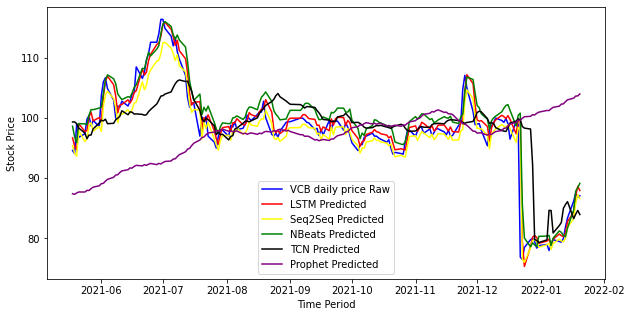

In [ ]:
# Plot predictions
plt.figure(figsize=(10,5))
plt.plot(tsdata_test.df.date[50:], y_test_unscale[:, :, 0], color='blue', label="VCB daily price Raw")
plt.plot(tsdata_test.df.date[50:], LSTM_y_pred_unscale[:, :, 0], color='red', label="LSTM Predicted")
plt.plot(tsdata_test.df.date[50:], Seq2Seq_y_pred_unscale[:, :, 0], color='yellow', label="Seq2Seq Predicted")
plt.plot(tsdata_test.df.date[50:], NBeats_y_pred_unscale[:, :, 0], color='green', label="NBeats Predicted")
plt.plot(tsdata_test.df.date[50:], TCN_y_pred_unscale[:, :, 0], color='black', label="TCN Predicted")
plt.plot(Prophet_tsdata_test.df.ds[50:],Prophet_y_pred[['yhat']].values, color='purple', label="Prophet Predicted")
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()